In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import calendar

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/sumanshrestha/Documents/AI Class Omdena/capstone-project-makaisuman/data/Temperature.csv')

In [12]:
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          880206 non-null  object 
 1   District      880206 non-null  object 
 2   Latitude      880206 non-null  float64
 3   Longitude     880206 non-null  float64
 4   Temp_2m       880206 non-null  float64
 5   MaxTemp_2m    880206 non-null  float64
 6   MinTemp_2m    880206 non-null  float64
 7   TempRange_2m  880206 non-null  float64
dtypes: float64(6), object(2)
memory usage: 53.7+ MB


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Extract the features 
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          880206 non-null  datetime64[ns]
 1   District      880206 non-null  object        
 2   Latitude      880206 non-null  float64       
 3   Longitude     880206 non-null  float64       
 4   Temp_2m       880206 non-null  float64       
 5   MaxTemp_2m    880206 non-null  float64       
 6   MinTemp_2m    880206 non-null  float64       
 7   TempRange_2m  880206 non-null  float64       
 8   year          880206 non-null  int32         
 9   month         880206 non-null  int32         
 10  day           880206 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 63.8+ MB


In [16]:
df.columns.tolist()

['Date',
 'District',
 'Latitude',
 'Longitude',
 'Temp_2m',
 'MaxTemp_2m',
 'MinTemp_2m',
 'TempRange_2m',
 'year',
 'month',
 'day']

In [17]:
# 2. Check for missing values
print(df.isnull().sum())

Date            0
District        0
Latitude        0
Longitude       0
Temp_2m         0
MaxTemp_2m      0
MinTemp_2m      0
TempRange_2m    0
year            0
month           0
day             0
dtype: int64


In [18]:
# 3. Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          880206 non-null  datetime64[ns]
 1   District      880206 non-null  object        
 2   Latitude      880206 non-null  float64       
 3   Longitude     880206 non-null  float64       
 4   Temp_2m       880206 non-null  float64       
 5   MaxTemp_2m    880206 non-null  float64       
 6   MinTemp_2m    880206 non-null  float64       
 7   TempRange_2m  880206 non-null  float64       
 8   year          880206 non-null  int32         
 9   month         880206 non-null  int32         
 10  day           880206 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 63.8+ MB


In [20]:
df.head()

Date      District  Latitude  Longitude  Temp_2m  MaxTemp_2m  \
0 1989-01-01  Arghakhanchi      27.9       83.2    14.16       20.40   
1 1989-01-02  Arghakhanchi      27.9       83.2    14.35       20.67   
2 1989-01-03  Arghakhanchi      27.9       83.2    14.22       20.88   
3 1989-01-04  Arghakhanchi      27.9       83.2    13.41       20.19   
4 1989-01-05  Arghakhanchi      27.9       83.2    13.99       20.53   

   MinTemp_2m  TempRange_2m  year  month  day  
0        9.76         10.63  1989      1    1  
1       10.37         10.31  1989      1    2  
2        9.90         10.99  1989      1    3  
3        9.31         10.88  1989      1    4  
4        9.50         11.03  1989      1    5

In [21]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          880206 non-null  datetime64[ns]
 1   District      880206 non-null  object        
 2   Latitude      880206 non-null  float64       
 3   Longitude     880206 non-null  float64       
 4   Temp_2m       880206 non-null  float64       
 5   MaxTemp_2m    880206 non-null  float64       
 6   MinTemp_2m    880206 non-null  float64       
 7   TempRange_2m  880206 non-null  float64       
 8   year          880206 non-null  int32         
 9   month         880206 non-null  int32         
 10  day           880206 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 63.8+ MB
None


In [22]:
import io

In [23]:
# 2. Check for missing values
print(df.isnull().sum())

Date            0
District        0
Latitude        0
Longitude       0
Temp_2m         0
MaxTemp_2m      0
MinTemp_2m      0
TempRange_2m    0
year            0
month           0
day             0
dtype: int64


In [24]:
# 4. Recheck for nulls after conversion (in case of invalid dates)
print(df['Date'].isnull().sum())

0


In [25]:
# 5. Drop rows with invalid/missing dates or other critical fields (optional)
df = df.dropna(subset=['Date'])

In [26]:
# 6. Check and remove duplicates
df = df.drop_duplicates()


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          880206 non-null  datetime64[ns]
 1   District      880206 non-null  object        
 2   Latitude      880206 non-null  float64       
 3   Longitude     880206 non-null  float64       
 4   Temp_2m       880206 non-null  float64       
 5   MaxTemp_2m    880206 non-null  float64       
 6   MinTemp_2m    880206 non-null  float64       
 7   TempRange_2m  880206 non-null  float64       
 8   year          880206 non-null  int32         
 9   month         880206 non-null  int32         
 10  day           880206 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 63.8+ MB


In [28]:
# 7. Feature engineering: extract year, month, day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Temperature Over Time (Line Plot)

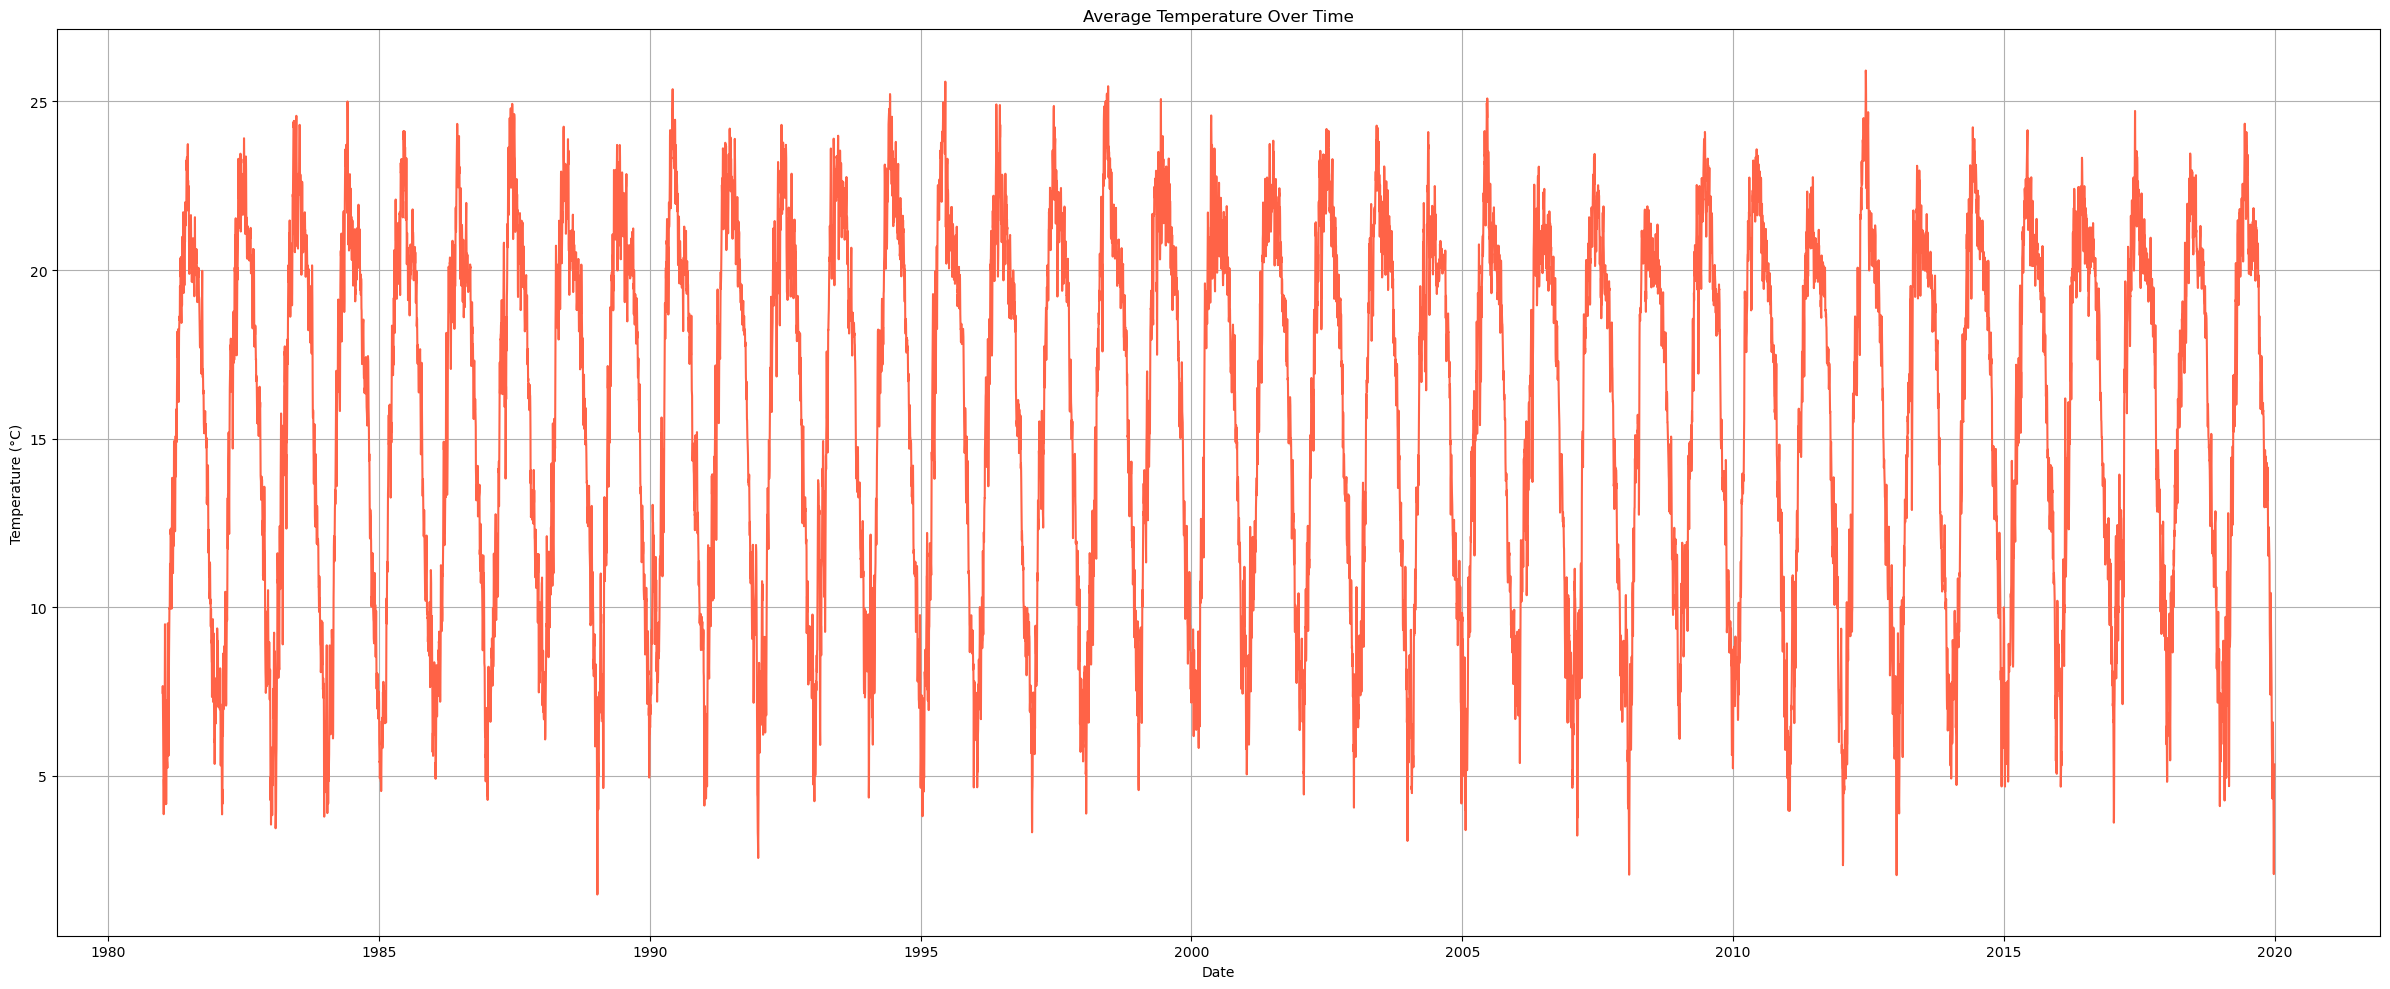

In [29]:
temp_by_date = df.groupby('Date')['Temp_2m'].mean()

plt.figure(figsize=(24, 10))
plt.plot(temp_by_date.index, temp_by_date.values, color='tomato')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

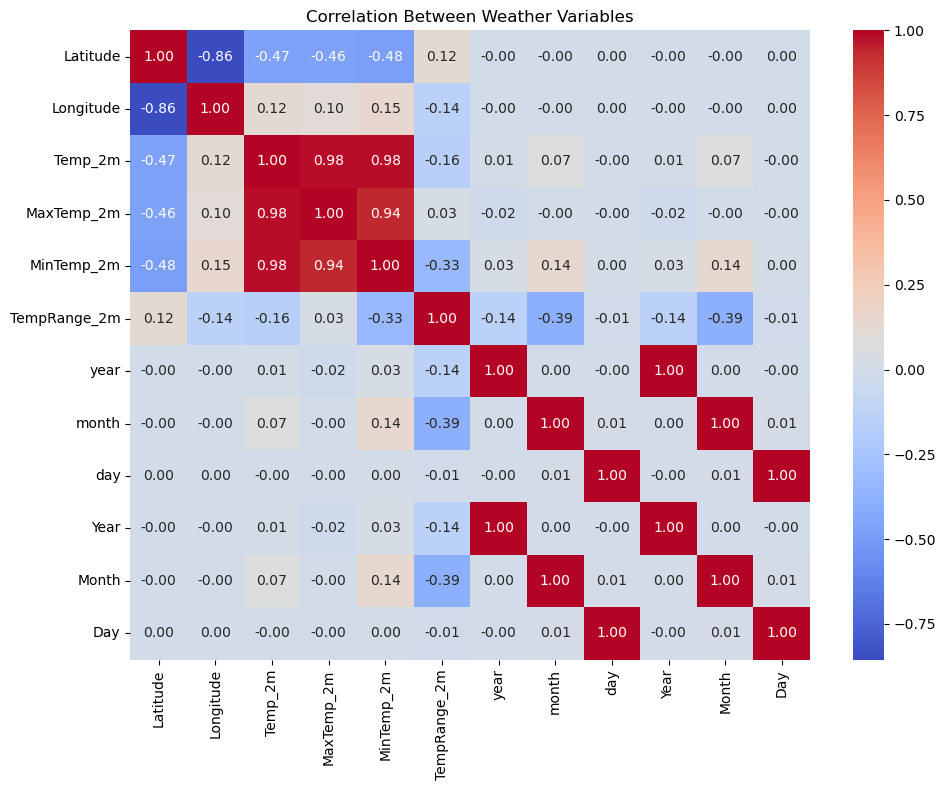

In [30]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Weather Variables')
plt.tight_layout()
plt.show()


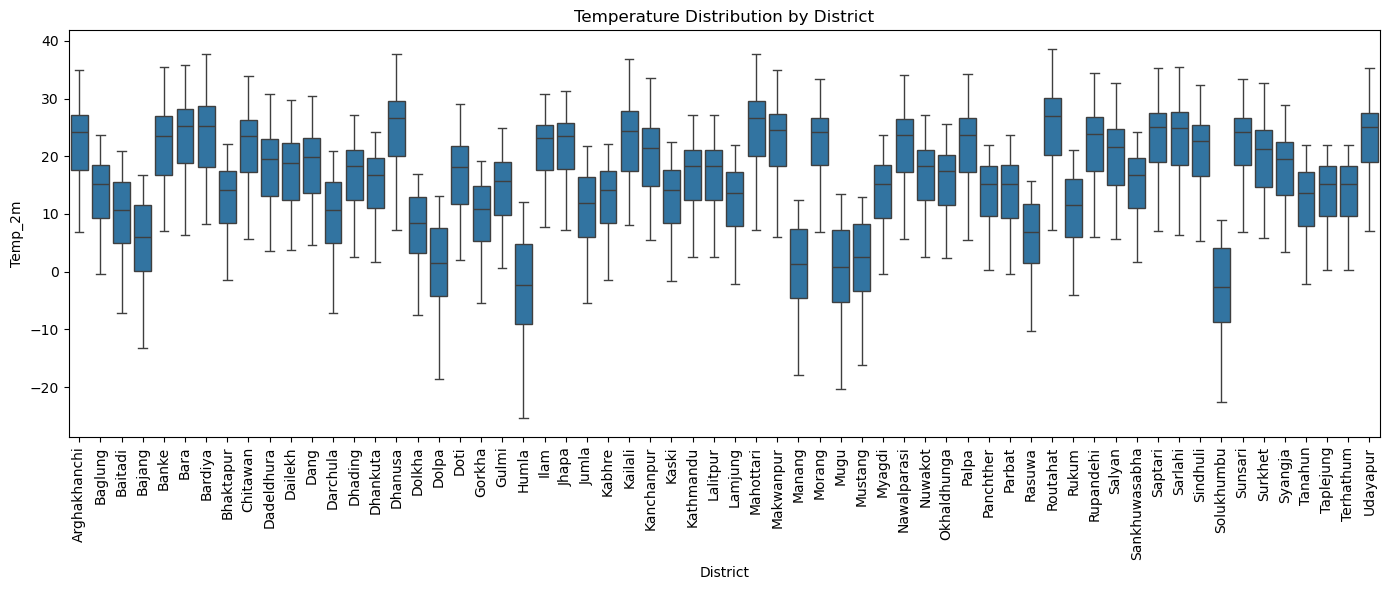

In [31]:
# Temperature Distribution by District (Boxplot)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='District', y='Temp_2m')
plt.xticks(rotation=90)
plt.title('Temperature Distribution by District')
plt.tight_layout()
plt.show()

In [36]:


# Center the map on the average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add points colored by Temp
for _, row in df.groupby('District').mean(numeric_only=True).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"{row.name}: {row['Temp_2m']:.1f} °C",
        color='blue',
        fill=True,
        fill_color='red' if row['Temp_2m'] > 30 else 'blue',
        fill_opacity=0.7
    ).add_to(m)

m  # Display the interactive map in Jupyter/Colab


/var/folders/mj/kbf0dkpx2136xtprhzggb4rh0000gn/T/ipykernel_5548/1582465700.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Temp_2m', palette='coolwarm')


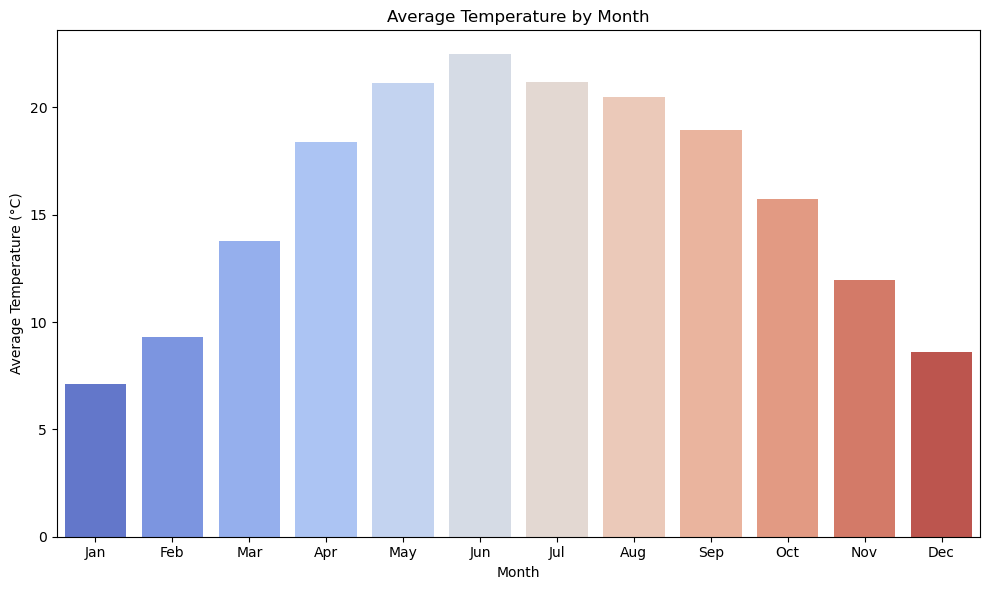

In [33]:
# Monthly Average Temperature Chart
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

# Group by Month and calculate average temperature
monthly_avg = df.groupby('Month')['Temp_2m'].mean().reset_index()

# Optional: map month numbers to names
import calendar
monthly_avg['Month'] = monthly_avg['Month'].apply(lambda x: calendar.month_abbr[x])

# Sort months by calendar order
monthly_avg['Month'] = pd.Categorical(monthly_avg['Month'], categories=calendar.month_abbr[1:], ordered=True)
monthly_avg = monthly_avg.sort_values('Month')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg, x='Month', y='Temp_2m', palette='coolwarm')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

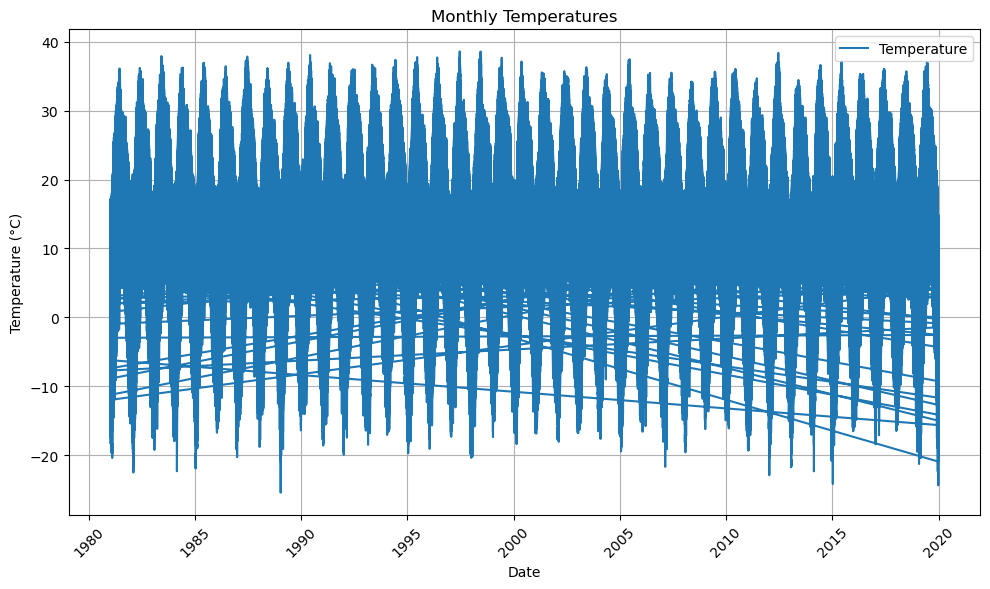

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Date'], df['Temp_2m'], label='Temperature', color='tab:blue')

ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Monthly Temperatures")
ax.grid(True)
ax.legend()

plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()       # Optional: adjust layout to prevent label cutoff
plt.show()

In [35]:
import streamlit as st
import pandas as pd
import folium
from folium import CircleMarker
import streamlit.components.v1 as components

# Sample DataFrame 'df' with 'District', 'Latitude', 'Longitude', and 'Temp_2m' columns
# For example:
# df = pd.DataFrame({
#     'District': ['District A', 'District B'],
#     'Latitude': [27.7, 28.2],
#     'Longitude': [85.3, 84.5],
#     'Temp_2m': [29.5, 31.2]
# })

st.title("Average Temperature by District")

# Calculate average temperature per district
avg_df = df.groupby('District').mean(numeric_only=True).reset_index()

# Center the map on the average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add points colored by temperature
for _, row in avg_df.iterrows():
    CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"{row['District']}: {row['Temp_2m']:.1f} °C",
        color='blue',
        fill=True,
        fill_color='red' if row['Temp_2m'] > 30 else 'blue',
        fill_opacity=0.7
    ).add_to(m)

# Render Folium map as HTML
map_html = m.get_root().render()

# Embed the map in the Streamlit app
components.html(map_html, height=500)

2025-04-30 20:50:12.895 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()